In [1]:
# Loading the dataset
# https://www.tensorflow.org/tutorials/quickstart/advanced

In [2]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_flat = np.vstack([img.reshape(-1,) for img in x_train])
x_test_flat = np.vstack([img.reshape(-1,) for img in x_test])

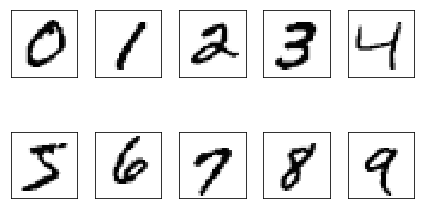

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_train_flat[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout()
plt.show()

In [5]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)

In [6]:
import tensorflow.keras as keras

# initialize model
model = keras.models.Sequential()

# add input layer
model.add(keras.layers.Dense(
    units=50,
    input_dim=x_train_flat.shape[1],
    activation='sigmoid') 
)
# add hidden layer
model.add(
    keras.layers.Dense(
        units=50,
        input_dim=50,
        activation='sigmoid')
    )
# add output layer
model.add(
    keras.layers.Dense(
        units=y_train_onehot.shape[1],
        input_dim=50,
        activation='softmax')
    )

# define SGD optimizer
sgd_optimizer = keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=0.9
)
# compile model
model.compile(
    optimizer=sgd_optimizer,
    loss='categorical_crossentropy'
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x_train_flat, y_train_onehot,
    batch_size=64, epochs=50,
    verbose=1, validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 42us/sample - loss: 2.0019 - val_loss: 1.6755
Epoch 2/50
54000/54000 [==============================] - 1s 26us/sample - loss: 1.4271 - val_loss: 1.1496
Epoch 3/50
54000/54000 [==============================] - 1s 26us/sample - loss: 1.0110 - val_loss: 0.8161
Epoch 4/50
54000/54000 [==============================] - 1s 26us/sample - loss: 0.7676 - val_loss: 0.6336
Epoch 5/50
54000/54000 [==============================] - 1s 27us/sample - loss: 0.6219 - val_loss: 0.5206
Epoch 6/50
54000/54000 [==============================] - 1s 26us/sample - loss: 0.5332 - val_loss: 0.4476
Epoch 7/50
54000/54000 [==============================] - 1s 26us/sample - loss: 0.4720 - val_loss: 0.3941
Epoch 8/50
54000/54000 [==============================] - 1s 26us/sample - loss: 0.4299 - val_loss: 0.3599
Epoch 9/50
54000/54000 [==============================] - 1s 26us/sample - loss: 0.3971 - val_l

In [9]:
# calculate training accuracy
y_train_pred = model.predict_classes(x_train_flat, verbose=0)
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]

print('Training accuracy:')
print(train_acc * 100)

# calculate testing accuracy
y_test_pred = model.predict_classes(x_test_flat, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]

print('Test accuracy:')
print(test_acc * 100)

Training accuracy:
94.51833333333333
Test accuracy:
93.93


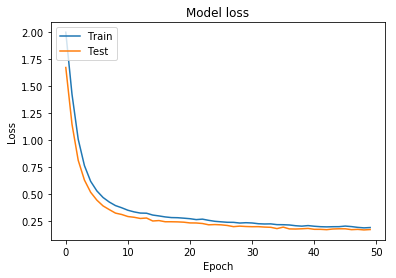

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
